# TP2 : Mesure de l’absorption de la lumière par des liquides
### Auteur : ARGUELLO Camilo

### Introduction

Dans ce TP, notre objectif c'est de mesurer l'absorption de la lumière par des liquides. Pour cela, nous allons utiliser un montage expérimental qui nous permettra de mesurer l'intensité lumineuse en fonction du temps. Ensuite, nous allons analyser les données obtenues pour déterminer le coefficient d'absorption du liquide.

### Montage expérimental

Le montage expérimental est composé d'une source de lumière (lampe), d'un liquide (soda), et d'un capteur qui mesure l'intensité lumineuse (téléphone). La source de lumière est une LED blanche qui émet de la lumière dans le visible. Le liquide est contenu dans un verre. Ainsi qu'un mètre pour mesurer les hauteurs du liquide Le montage est illustré dans la figure ci-dessous.

![Montage expérimental](./images/montage.jpeg)

Pour cet expériment on va mesurer avec 3 produits différents, le soda rouge, la soda jaune et le soda bleu.

### Protocole expérimental

1. L'expériment doit se faire dans un endroît sombre, pour éviter que la lumière ambiante interfère avec les mesures.
2. On place le verre sur le capteur (téléphone), et en-dessous de la source de lumière. Eux, ils doivent être alignés, pour que la lumière passe à travers du liquide et arrive au capteur.
3. Mesurer différentes longueurs tels que, la distance entre la source de lumière et le capteur, et la hauteur du capteur, l'épaisseur du fond de verre, la hauteur de verre.
4. Ensuite, nous mesure que sous des conditions normales de lumière, si on met le doigt au-dessous du capteur, il va avoir une intensité luminuse égale à 0. $l_x = 0$.

<div style="
    width:100%;
    height:auto;
    margin: 1.5625em auto;
    padding: 0 0.6rem 0;
    overflow: hidden;
    page-break-inside: avoid;
    border-left: 0.2rem solid;
    border-left-color: rgba(87,154,202,1);
    border-bottom-color: rgba(87,154,202,1);
    border-right-color: rgba(87,154,202,1);
    border-top-color: rgba(87,154,202,1);
    border-radius: 0.2rem;
    box-shadow: 0 0.2rem 0.5rem rgb(0 0 0 / 5%), 0 0 0.0625rem rgb(0 0 0 / 10%);
    transition: color .25s,background-color .25s,border-color .25s;">
<p style="
    position: relative;
    margin: 0 -0.6rem;
    padding: 0.4rem 0.6rem 0.4rem 2rem;
    font-weight: 700;
    background-color: rgba(87,154,202,.1);">
    Remarque: Qu'est c'est passe si lorsqu'on place notre doigt sur le capteur, il ne marque pas 0?
</p>
</div>

> Dans ce cas on doit faire une calibration du montage, soit eloigner la source lumineuse, soit mettre un filtre sur le capteur, ou faire 'tare' à partir de la valeur initiale, c'est à dire considèrer un bias pour les mesures. 

#### Loi de Beer-Lambert

La loi de Beer-Lambert est une loi qui décrit l'absorption de la lumière par un milieu. Elle est donnée par l'équation suivante:

$$I = I_0 \; e^{-\epsilon \ l \ C}$$

Où $I_0$ est l'intensité lumineuse incidente, $I$ est l'intensité lumineuse transmise, $\epsilon$ est le coefficient d'absorption molaire, $l$ est l'épaisseur du milieu, et $C$ est la concentration du milieu.

On cherche **le coefficient d'absortion molaire $\epsilon$**, qui dépend du soluté, ainsi que de la longeur d'onde lumineuse. Pour cela on fait de mesures dans un récipient où la concentration est connue, et on fait un ajustement linéaire pour trouver les valeurs souhaitées.


#### Erreur de mesure de hauteur

Pour considèrer toutes les erreurs de mesure, on commence pour celles de la hauteur. Dont on mesure la hauteur de verre, l'épaisseur du fond de verre, ainsi que la distance entre la source de lumière et le capteur. On peut trouver l'erreur pour chaque mesure de hauteur en utilisant la formule suivante:

$$ \Delta h^2 = \sum _{i=1}^n \left(\frac{\partial h}{\partial x_i}\right)^2 \Delta x_i^2 $$

où $h$ est la hauteur, $x_i$ est la mesure de la hauteur, et $\Delta x_i$ est l'erreur de mesure de la hauteur. Pour chaque mesure de hauteur, on mesure 3 fois, et on prend la valeur moyenne.

$$ \Delta h^2 = \left(\frac{\partial h}{\partial x_1}\right)^2 \Delta x_1^2 + \left(\frac{\partial h}{\partial x_2}\right)^2 \Delta x_2^2 + \left(\frac{\partial h}{\partial x_3}\right)^2 \Delta x_3^2$$

Où, on peut ressoudre l'équation en calculant la moyenne des trois mesures de hauteur.

$$ h = \frac{x_1 + x_2 + x_3}{3} $$

Ainsi les dérivées partielles:

$$ \left(\frac{\partial h}{\partial x_1}\right)^2 = \left(\frac{\partial h}{\partial x_2}\right)^2 = \left(\frac{\partial h}{\partial x_3}\right)^2 = \left(\frac{1}{3}\right)^2 $$

$$ \Delta h^2 = \left(\frac{1}{3}\right)^2 \Delta x_1^2 + \left(\frac{1}{3}\right)^2 \Delta x_2^2 + \left(\frac{1}{3}\right)^2 \Delta x_3^2$$

$$ \Delta h^2 = \left(\frac{1}{3}\right)^2 \left(\Delta x_1^2 + \Delta x_2^2 + \Delta x_3^2\right) $$

Si on considère que les trois mesures de hauteur sont indépendantes, mais $\Delta x_1 = \Delta x_2 \Delta x_3$ alors on peut simplifier l'équation en:

$$ \Delta h^2 = \left(\frac{1}{3}\right)^2 \left(3 \Delta x^2\right) $$

$$ \Delta h^2 = \left(\frac{1}{9}\right) \Delta x^2 $$

$$ \Delta h = \sqrt{\left(\frac{1}{9}\right) \Delta x^2} $$


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import qexpy
from qexpy import MeasurementArray
import qexpy.plotting as qplt
from scipy.stats import linregress
from scipy.optimize import minimize

In [2]:
def calculate_uncertainty (hs):
    """
    Cette fonction calcule l'incertitude sur la moyenne d'une série de mesures
    """
    avg = np.mean(hs)
    std = np.std(hs) 
    dx = std / np.sqrt(len(hs))
    dh = np.sqrt(dx**2 + dx**2)
    return avg, dh

In [3]:
# On calcule trois fois la distance entre la lampe et le capteur
hs_lamp_sensor = np.array([40.1,39.8,40.0]) # distances mesurées en cm
avg_hs_lamp_sensor, dh_lamp_sensor = calculate_uncertainty(hs_lamp_sensor)
print('Distance entre la lampe et le capteur = {:.3} cm ± {:.2} cm'.format(avg_hs_lamp_sensor, dh_lamp_sensor))

hs_verre = np.array([10.05,10.09,10.0]) # hauteurs mesurées en cm
avg_verre, dh_verre = calculate_uncertainty(hs_verre)
print('Hauteur de verre = {:.3} cm ± {:.2} cm'.format(avg_verre, dh_verre))

hs_ep_verre = np.array([0.5, 0.6, 0.5]) # hauteurs mesurées en cm
avg_ep_verre, dh_ep_verre = calculate_uncertainty(hs_ep_verre)
print('Epaisseur du fond de verre = {:.3} cm ± {:.2} cm'.format(avg_ep_verre, dh_ep_verre))

Distance entre la lampe et le capteur = 40.0 cm ± 0.1 cm
Hauteur de verre = 10.0 cm ± 0.03 cm
Epaisseur du fond de verre = 0.533 cm ± 0.038 cm


Le montage expérimental est illustré dans la figure ci-dessous.

![Mesure Illustration](./images/mesure-illustration/mesure-illustration1.jpg)

Pour notre expériment on a choisi 3 liquides avec des couleurs différentes (<span style="color:red;">rouge</span>, <span style="color:blue;">bleu</span>, et <span style="color:yellow;">jaune</span>). Pour chacune on a pris 6 mesures des hauteurs de $1cm$ dans le bécher. 

In [4]:
hs_hauteur = np.array([1.5, 1.03, 0.98, 1.03, 0.97, 1.05]) # hauteurs mesurées en cm
avg_hauteur, delta_hauteur = calculate_uncertainty(hs_hauteur)
err_hauteur = np.abs(avg_hauteur - hs_hauteur)
print('Erreur hauteurs = {:.3} cm ± {:.2} cm'.format(avg_hauteur, delta_hauteur))

Erreur hauteurs = 1.09 cm ± 0.11 cm


L'erreur estimé pour chaque mesure est d'environ $\Delta h \approx \pm 0.1cm$. L'image ci dessous montre la façon dont on a mesuré la hauteur.

![Niveux de liquide avec des erreurs](./images/mesure-illustration/glass-levels.jpg)

In [5]:
def load_data(folder_path, color='yellow'):
    """
    Cette fonction charge les données des fichiers csv dans un dictionnaire
    @param folder_path: chemin du dossier contenant les données
    @param color: couleur des données à charger
    """
    Color={}
    for folder_name in os.listdir(folder_path):
        folder_path_full = os.path.join(folder_path, folder_name)
        if os.path.isdir(folder_path_full):
            raw_data_path = os.path.join(folder_path_full, 'Raw Data.csv')
            if os.path.isfile(raw_data_path):
                var_name = extract_yellow_number(folder_name, color)
                Color[var_name] = pd.read_csv(raw_data_path)
    return Color

def extract_yellow_number(folder_name, color='yellow'):
    """
    Cette fonction extrait le nom de color avec son numéro pour nommer la colonne
    @param folder_name: nom du dossier
    @param color: couleur à extraire
    """
    substrings = folder_name.split(color)
    if len(substrings) > 1:
        color_number = substrings[1]
        return f'{color}{color_number}'
    else:
        return None

#### Erreur de mesure sur la luminosité

On mesure la luminosité sans le bécher au-dessous du recepteur, après et on la mesure avec bécher vide. L'objectif est de déterminer l'impact du bécher sur la luminosité. Ainsi on place et enleve un objet sombre devant la lampe afin de bloquer la lumière pour voir l'impact sur la luminosité.

In [6]:
# import data
tare_with_glass = pd.read_csv('./data/Tare/Licht 2023-04-21_21-02-27-blue-tare/Raw Data.csv') # Avec bécher
tare_without_glass = pd.read_csv('./data/Tare/Raw Data.csv') # Sans bécher

# calculer min et max
min_tare_without_glass = np.min(tare_without_glass['Illuminance (lx)'])
min_tare_with_glass = np.min(tare_with_glass['Illuminance (lx)'])

max_tare_without_glass = np.max(tare_without_glass['Illuminance (lx)'])
max_tare_with_glass = np.max(tare_with_glass['Illuminance (lx)'])

dif_min_tare = np.abs(min_tare_without_glass - min_tare_with_glass)
dif_max_tare = np.abs(max_tare_without_glass - max_tare_with_glass)

print('Différence entre les valeurs minimales (avec verre) et (sans verre) = {:.3} lx'.format(dif_max_tare))
print('Différence entre les valeurs maximales (avec verre) et (sans verre) = {:.3} lx'.format(dif_min_tare))

error_lum = dif_max_tare / max_tare_without_glass

# percentage of difference max
print('Pourcentage de différence entre les valeurs maximales (avec verre) et (sans verre) = {:.3} %'.format(error_lum * 100))

Différence entre les valeurs minimales (avec verre) et (sans verre) = 1.75e+02 lx
Différence entre les valeurs maximales (avec verre) et (sans verre) = 0.0 lx
Pourcentage de différence entre les valeurs maximales (avec verre) et (sans verre) = 16.4 %


On peut observer que la différence entre la luminosité s'il y a un objet sombre (avec et sans) bécher on obtient une valeur minimale de `0` lx. Ce qui montre que le capteur ne reçoit pas de lumière à partir d'autre sources. Ainsi on voit une différence de `16.4%` entre la luminosité avec et sans le bécher, ce valeur sera utilisée comme erreur de mesure de luminosité.

On peut aussi avoir d'autres types d'erreurs, comme par exemple par rapport la sensibilité du capteur, ou la tansparence du liquide, cependant ces erreurs ne sont pas considérées dans ce travail.

In [28]:
folder_path = './data/Yellow/'
Yellow = load_data(folder_path, color='yellow')
print(list(sorted(Yellow.keys()))) # liste de mesures jaunes (on doit les trier) pour avoir valeurs 10..60

folder_path = './data/Blue/'
Blue = load_data(folder_path, color='blue')
print(list(sorted(Blue.keys())))

folder_path = './data/Red/'
Red = load_data(folder_path, color='red')
print(list(sorted(Red.keys())))

# add column with color_name
for color, color_dict in zip(['jaune', 'bleu', 'rouge'], [Yellow, Blue, Red]):
    for key in color_dict.keys():
        color_dict[key]['color'] = color

# Dict Colors
Colors = np.array([Yellow, Blue, Red])
# Dict Parameters to find
Parameters = np.array([{},{},{}]) # analytique, numerique, quexpy

['yellow10', 'yellow20', 'yellow30', 'yellow40', 'yellow50', 'yellow60']
['blue10', 'blue20', 'blue30', 'blue40', 'blue50', 'blue60']
['red10', 'red20', 'red30', 'red40', 'red50', 'red60']


On fait une vérification des données collectées avec Pandas, pour une valeur donnée `'yellow10'` c'est-à-dire les valeurs de luminosité pour le liquide jaune à une hauteur $h=1cm \pm 0.1cm$.

In [8]:
Yellow['yellow10'].head()

,Time (s),Illuminance (lx),color
0,0.036445,615.0,jaune
1,0.058445,615.0,jaune
2,0.098445,613.0,jaune
3,0.198445,613.0,jaune
4,0.258445,613.0,jaune


In [9]:
Blue['blue10'].head()

,Time (s),Illuminance (lx),color
0,0.036448,778.0,bleu
1,0.198448,778.0,bleu
2,0.338448,778.0,bleu
3,0.478448,789.0,bleu
4,0.618448,800.0,bleu


In [10]:
Red['red10'].head()

,Time (s),Illuminance (lx),color
0,0.043121,763.0,rouge
1,0.065121,763.0,rouge
2,0.105121,763.0,rouge
3,0.245121,763.0,rouge
4,0.385121,763.0,rouge


On fait une validation pour savoir quelle erreur est dominante, soit l'erreur de mesure de hauteur, soit l'erreur de mesure de luminosité. On considère comme mesures d'hauteur les valeurs depuis $h=1cm$ jusqu'à $h=6cm$. 

In [11]:
def plot_illuminance_hauteur(error=None, error_name='hauteur'):
    """
    Cette fonction trace les courbes d'illuminance en fonction de la hauteur de liquide
    @param error: erreur de mesure
    @param error_name: nom de l'erreur
    """
    fig, axes = plt.subplots(1, len(Colors), figsize=(15, 5))

    for i,Color in enumerate (Colors):
        x = np.arange(1, 7, 1)   # mesures de hauteur par défaut (1..6) en cm
                                    # On assume que les mesures sont faites à intervalles réguliers
                                    # Pour prendre en compte les possibles erreurs de mesure, on utilise le yerr
        y = [np.mean(Color[key]['Illuminance (lx)']) for key in sorted(Color.keys())]
        if error_name == 'hauteur':
            yerr = [MeasurementArray(x, error).std() for key in sorted(Color.keys())]
        else:
            yerr = [MeasurementArray(Color[key]['Illuminance (lx)'].values, error).std() for key in sorted(Color.keys())]

        # Get color name
        color_name = [Color[key]['color'] for key in sorted(Color.keys())][0][0]

        # Create an error bar chart
        axes[i].errorbar(x, y, yerr=yerr, fmt='o', ecolor='red', capsize=5)
        axes[i].set_title('Erreurs par rapport la {} {}'.format(error_name, color_name))
        axes[i].set_xlabel('Hauteur liquide (cm)')
        axes[i].set_ylabel('Illuminance (lx)')
    plt.show()

def get_error_std(error=None, error_name='hauteur'):
    """
    Cette fonction calcule l'erreur standard
    @param error: erreur de hauteur ou de luminance
    @param error_name: nom de l'erreur
    """
    errors = []
    for i,Color in enumerate (Colors):
        x = np.arange(1, 7, 1) # mesures de hauteur
        if error_name == 'hauteur':
            yerr = [MeasurementArray(x, error).std() for key in sorted(Color.keys())]
        else:
            yerr = [MeasurementArray(Color[key]['Illuminance (lx)'].values, error).std() for key in sorted(Color.keys())]

        errors.append(np.mean(yerr))
    return errors

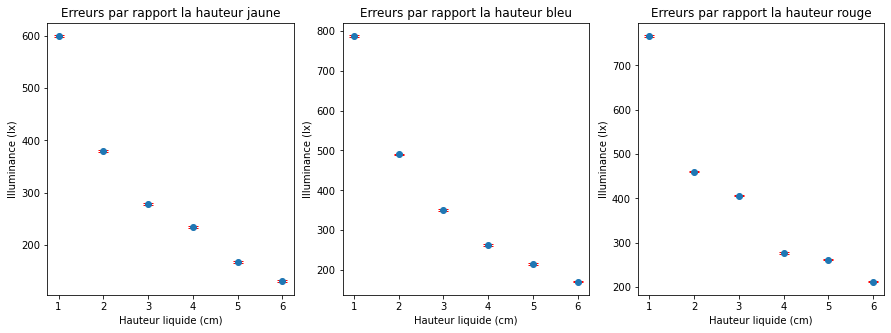

Erreur standard pour la hauteur = 1.87


In [12]:
error = err_hauteur
error_name = 'hauteur'
plot_illuminance_hauteur(error, error_name)
error_std = get_error_std(error, error_name)
print('Erreur standard pour la hauteur = {:.3}'.format(np.mean(error_std)))

Les valeurs `hs_hauteur` sont celles prises en compte lors du calcul de l'erreur. Ils sont le point de référence aux mesures des 3 couleurs. Autant l'erreur est mesurée pour chaque $1cm$, autant il ne se reflète pas autant de différence entre les valeurs à $1cm$ qu'à $6cm$. Entre les 3 couleurs l'erreur ne varie pas beaucoup.

Maintenant, on va vérifier avec l'erreur qu'on avait estimé pour la luminosité. On considère la valeur d'erreur `error_lum = 0.164` qui est la différence entre la luminosité avec et sans bécher.

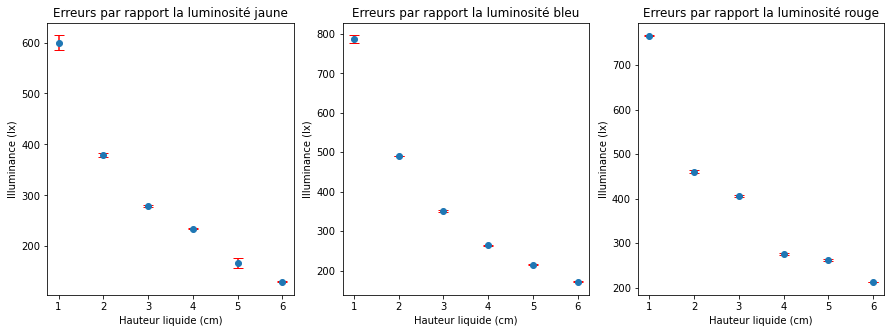

Erreur standard pour la luminosité = 3.31


In [13]:
error = error_lum
error_name = 'luminosité'
plot_illuminance_hauteur(error, error_name)
error_std = get_error_std(error, error_name)
print('Erreur standard pour la luminosité = {:.3}'.format(np.mean(error_std)))

D'après les résultats, on peut voir que l'erreur est plus grande que celle de la hauteur, et qu'elle est constante pour chaque couleur. C'est-à-dire que l'erreur de mesure de luminosité est dominante.

### Adjustement du modèle

Maintenant on fait un ajustement du modèle pour chaque couleur. Pour cela on va utiliser différentes méthodes de régression linéaire. En commençant par la méthode analytique où on peut trouver les valeurs de $a$ et $b$ en résolvant l'équation de la forme: $y = a \ x + b$.

D'après la loi de Beer-Lambert, on a:

$$ I = I_0 \; e^{-\epsilon \ l \ C} $$

$$ \ln (I) = \ln (I_0) - \ln(e^{\epsilon \ l \ C}) $$

$$ \ln (I) = \ln (I_0) - \epsilon \ l \ C $$

de la forme: $\ln (I) = a \ l + b$

$$ \ln (I) = - \epsilon \ l \ C + \ln (I_0) $$

où $a = - \epsilon \ l \ C$ et $b = \ln (I_0)$

Les erreurs trouvées précédemment ne sont pas altérées par l'analyse par régression linéaire, car lorsqu'on obtient les valeurs de la droite, on peut trouver le biais pour ajuster la droite à la valeur réelle.

Coefficient de corrélation pour le liquide jaune = -0.944
I_0: 601.195377 ε C: -86.530978


Coefficient de corrélation pour le liquide bleu = -0.93
I_0: 778.585934 ε C: -114.022560


Coefficient de corrélation pour le liquide rouge = -0.918
I_0: 746.637203 ε C: -99.848635




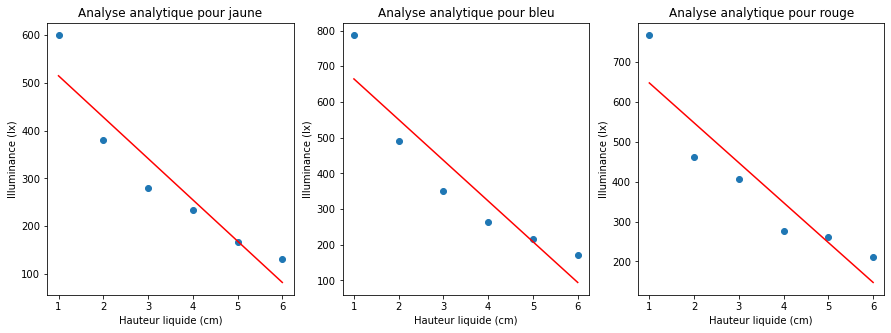

In [29]:

fig, axes = plt.subplots(1, len(Colors), figsize=(15, 5))

for i,Color in enumerate (Colors):
    x = np.arange(1, 7, 1) # measurements
    y = [np.mean(Color[key]['Illuminance (lx)']) for key in sorted(Color.keys())]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    # Get color name
    color_name = [Color[key]['color'] for key in sorted(Color.keys())][0][0]
    print('Coefficient de corrélation pour le liquide ' + str(color_name) + ' = {:.3}'.format(r_value))
    print("I_0: %f \u03B5 C: %f" % (intercept, slope))
    # add to Parameters dict
    Parameters[0][color_name] = {'I_0': slope, 'eC': intercept}
    print('\n')
    # Tracer les points
    axes[i].plot(x, y, 'o', label='original data')
    axes[i].set_title('Analyse analytique pour ' + str(color_name))
    axes[i].set_xlabel('Hauteur liquide (cm)')
    axes[i].set_ylabel('Illuminance (lx)')
    # trace la droite de régression
    axes[i].plot(x, intercept + slope*x, 'r', label='fitted line')
plt.show()

Maintenant, on s'intéresse à la minimisation de la fonction $X^2$ qui va nous permettre de trouver les valeurs de $I_0$ et $\epsilon C$.

$$ X^2 = \sum_{i=1}^n \left( \frac{y_i - I_0 exp(\epsilon C x_i)}{\sigma_i} \right)^2 $$

In [24]:
def X_2(params, x, y, sigma):
    """
    Cette fonction calcule le X_2 à minimiser
    """
    I0, epsilon, C = params
    predictions = I0 * np.exp(epsilon * C * x)
    residuals = (y - predictions) / sigma
    return np.sum(residuals**2)

Couleur jaune :
Optimized parameters I_0: 796.22 ε C: 10.12

Couleur bleu :
Optimized parameters I_0: 1068.53 ε C: 10.13

Couleur rouge :
Optimized parameters I_0: 954.78 ε C: 10.09



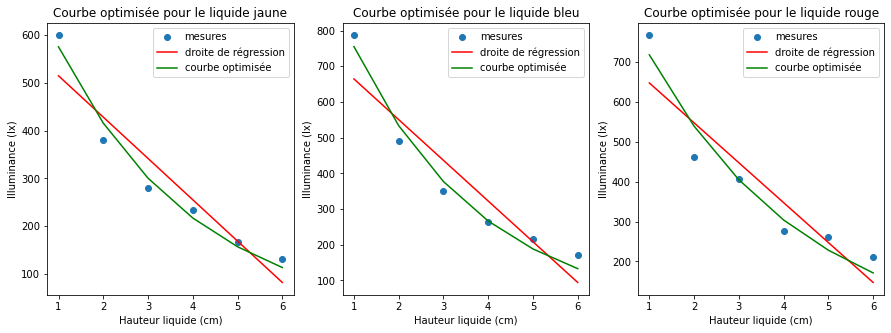

In [32]:
fig, axes = plt.subplots(1, len(Colors), figsize=(15, 5))

for i,Color in enumerate (Colors):
    x = np.arange(1, 7, 1) # measurements
    y = [np.mean(Color[key]['Illuminance (lx)']) for key in sorted(Color.keys())]
    sigma = np.std(y)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # minimiser les données avec scipy.optimize.minimize
    color_name = [Color[key]['color'] for key in sorted(Color.keys())][0][0]
    params0 = [intercept, 10, 1.0] # initial guess
    result = minimize(X_2, params0, args=(x, y, sigma))

    y_pred = result.x[0] * np.exp(result.x[1] * result.x[2] * x)

    print('Couleur ' + str(color_name) + ' :')
    print('Optimized parameters I_0: {:.2f} \u03B5 C: {:.2f}'.format(result.x[0], result.x[1]) + '\n')
    Parameters[1][color_name] = {'I_0': result.x[0], 'eC': result.x[1]}
    # Tracer les points
    axes[i].plot(x, y, 'o', label='mesures')
    # trace la droite de régression
    axes[i].plot(x, intercept + slope*x, 'r', label='droite de régression')
    # trace la courbe optimisée linéaire
    axes[i].plot(x, y_pred , 'g', label='courbe optimisée')
    axes[i].set_title('Courbe optimisée pour le liquide ' + str(color_name))
    axes[i].set_xlabel('Hauteur liquide (cm)')
    axes[i].set_ylabel('Illuminance (lx)')
    axes[i].legend()
plt.show()

On voit que la fonction $X^2$ est correctement minimisée et que les valeurs de $\epsilon C $ et $I_0$ sont proches des valeurs mesurés. Ici on trouve les valeurs de coefficient $\epsilon C$ très proches l'unes des autres couleurs. De la même manière, avec la fonction `minimize` on peut trouver les valeurs les plus proches à l'aide d'une fonction exponentielle. Par conséquent, dans notre cas, les valeurs de $\epsilon C$ sont positives. De même, on peut aussi indiquer à la fonction `minimize` les valeus limites avec le paramètre `bounds`.

Finalement, on fait un ajustement avec la bibliothèque `qexpy`.

Valeurs trouvees par qexpy pour le liquide jaune
ε C: slope = -54 +/- 5
I_0: intercept = 450 +/- 20


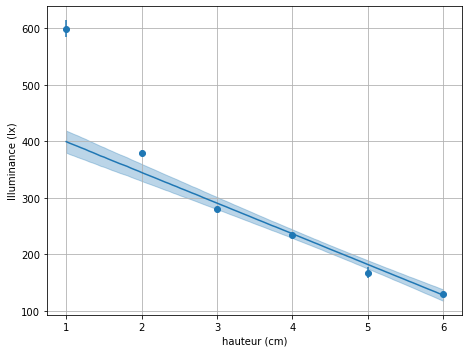

Valeurs trouvees par qexpy pour le liquide bleu
ε C: slope = -92 +/- 7
I_0: intercept = 670 +/- 20


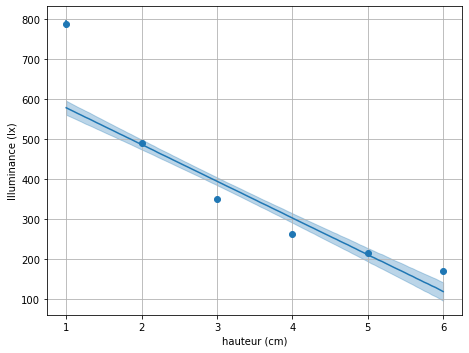

Valeurs trouvees par qexpy pour le liquide rouge
ε C: slope = -108 +/- 8
I_0: intercept = 850 +/- 40


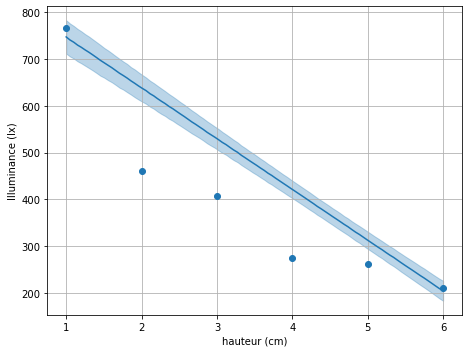

In [30]:
# ajustement par qexpy
for i,Color in enumerate (Colors):
    x = np.arange(1, 7, 1) # measurements
    y = [np.mean(Color[key]['Illuminance (lx)']) for key in sorted(Color.keys())]
    sigma = [MeasurementArray(Color[key]['Illuminance (lx)'].values, error_lum).std() for key in sorted(Color.keys())]
    color_name = [Color[key]['color'] for key in sorted(Color.keys())][0][0]
    # ajustement par qexpy
    xmeas = qexpy.MeasurementArray(x, name="hauteur (cm)")
    ymeas = qexpy.MeasurementArray(y, error=sigma, name="Illuminance (lx)")
    fig = qplt.plot(xmeas, ymeas, name='données', residuals=True)
    result = fig.fit(model=qexpy.FitModel.LINEAR)
    a_qexpy = result.params[0].value # extraction de a
    b_qexpy = result.params[1].value # extraction de b
    print('Valeurs trouvees par qexpy pour le liquide ' + str(color_name))
    print('\u03B5 C:', result.params[0])
    print('I_0:', result.params[1])
    Parameters[2][color_name] = {'I_0': result.params[1].value, 'eC': result.params[0].value}
    qplt.show()

### Comparaison entre les méthodes

On a une variable `Parameters` qui contient l'information de toutes les valeurs de $I_0$ et $\epsilon C$ pour chaque couleur, pour chaque méthode.

In [35]:
# Initialize empty dictionaries to store the eC and I_0 values for each color
eC_values = {'jaune': [], 'bleu': [], 'rouge': []}
I_0_values = {'jaune': [], 'bleu': [], 'rouge': []}

for d in Parameters:
    # Iterate over each color in the dictionary
    for color, values in d.items():
        # Check if the dictionary contains 'eC' and 'I_0' values for the color
        if 'eC' in values and 'I_0' in values:
            eC_values[color].append(values['eC'])
            I_0_values[color].append(values['I_0'])

# Print the mean and standard deviation of the eC and I_0 values for each color
for color in eC_values:
    print('Liquide ' + str(color) + ' :')
    print('Moyenne coefficient \u03B5 C = {:.3}'.format(np.mean(eC_values[color])))
    print('Moyenne I_0 = {:.3} lx'.format(np.mean(I_0_values[color])))
    print('Écart-type \u03B5 C = {:.3}'.format(np.std(eC_values[color])))
    print('Écart-type I_0 = {:.3} lx'.format(np.std(I_0_values[color])))
    print('\n')

Liquide jaune :
Moyenne coefficient ε C = 1.86e+02
Moyenne I_0 = 3.88e+02 lx
Écart-type ε C = 2.95e+02
Écart-type I_0 = 3.63e+02 lx


Liquide bleu :
Moyenne coefficient ε C = 2.32e+02
Moyenne I_0 = 5.41e+02 lx
Écart-type ε C = 3.88e+02
Écart-type I_0 = 4.91e+02 lx


Liquide rouge :
Moyenne coefficient ε C = 2.16e+02
Moyenne I_0 = 5.7e+02 lx
Écart-type ε C = 3.78e+02
Écart-type I_0 = 4.75e+02 lx




On peut voir que l'écart type pour les valeurs trouvées du coefficient $\epsilon C$ sont considérables. Cela s'explique en partie pour la fonction `minimize` qui a trouvé une solution à l'équation de $X^2$ avec une fonction exponentielle. Cependant, on peut considérer que la valeur moyenne d'$\epsilon C$ est plus élevée dans le liquide rouge et plus faible dans le liquide jaune. Par conséquent, le liquide rouge a une absorption lumineuse plus élevée que le liquide jaune.

Pour améliorer la précision des résultats, on peut utiliser par exemple un modèle exponentiel de `quexpy`, comme celui-ci:

Valeurs trouvees par qexpy pour le liquide jaune
ε C: decay constant = 0.263 +/- 0.003
I_0: amplitude = 640 +/- 7 lx


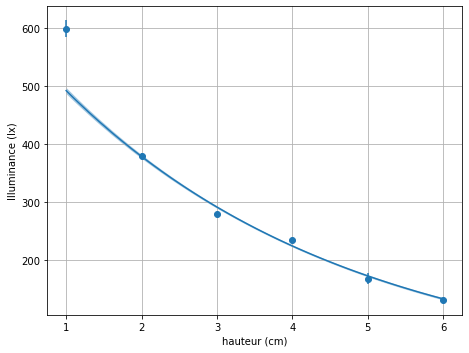

Valeurs trouvees par qexpy pour le liquide bleu
ε C: decay constant = 0.2842 +/- 0.0008
I_0: amplitude = 864 +/- 2 lx


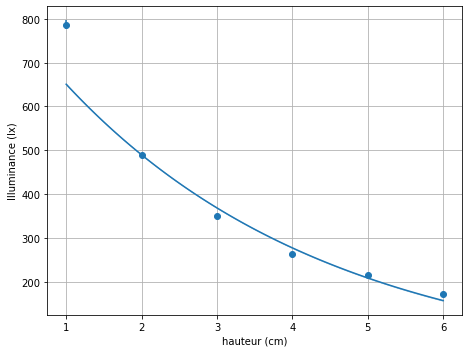

Valeurs trouvees par qexpy pour le liquide rouge
ε C: decay constant = 0.2595 +/- 0.0004
I_0: amplitude = 984 +/- 1 lx


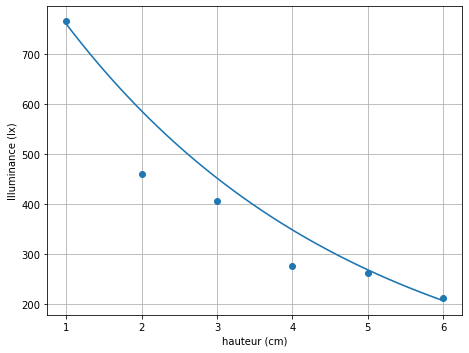

In [36]:
# ajustement par qexpy
import warnings

for i,Color in enumerate (Colors):
    x = np.arange(1, 7, 1) # measurements
    y = [np.mean(Color[key]['Illuminance (lx)']) for key in sorted(Color.keys())]
    sigma = [MeasurementArray(Color[key]['Illuminance (lx)'].values, error_lum).std() for key in sorted(Color.keys())]
    color_name = [Color[key]['color'] for key in sorted(Color.keys())][0][0]
    # ajustement par qexpy
    xmeas = qexpy.MeasurementArray(x, name="hauteur (cm)")
    ymeas = qexpy.MeasurementArray(y, error=sigma, name="Illuminance (lx)")
    fig = qplt.plot(xmeas, ymeas, name='données', residuals=True)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        result = fig.fit(model=qexpy.FitModel.EXPONENTIAL)
        a_qexpy = result.params[0].value # extraction de a
        b_qexpy = result.params[1].value # extraction de b
        print('Valeurs trouvees par qexpy pour le liquide ' + str(color_name))
        print('\u03B5 C:', result.params[1])
        print('I_0:', result.params[0], 'lx')
    qplt.show()

Cette méthode nous permet d'obtenir une minimisation plus précise des valeurs d'échantillonnage avec les estimations. De la même manière, nous réduisons l'incertitude des valeurs jusqu'à ce qu'elle soit en moyenne de `0,25%` de la différence entre les valeurs d'échantillonnage.

### Estimation des erreurs sur les paramètres ajustés

Finalement, on fait une estimation des erreurs à partir des données mesurées.

In [37]:
for color in eC_values:
    _, d = calculate_uncertainty(eC_values[color])
    print('Liquide ' + str(color) + ' :')
    print('Erreur sur \u03B5 C {:.2}'.format(d))
    _, d = calculate_uncertainty(I_0_values[color])
    print('Erreur sur I_0 {:.2} cm'.format(d))
    print('\n')

Liquide jaune :
Erreur sur ε C 2.4e+02
Erreur sur I_0 3e+02 cm


Liquide bleu :
Erreur sur ε C 3.2e+02
Erreur sur I_0 4e+02 cm


Liquide rouge :
Erreur sur ε C 3.1e+02
Erreur sur I_0 3.9e+02 cm




### Conclusion

Une expérience a été réalisée sur la base de 3 liquides de couleurs différentes, la luminosité (lx) étant mesuré à différentes hauteurs. Différentes méthodes ont été établies pour ajuster les données et obtenir les valeurs de $\epsilon C$ et $I_0$. Il a été possible de montrer l'importance du biais lors de la régression linéaire de la forme $y = a x + b$. Les valeurs trouvées pour $\epsilon C$ ont un taux élevé pour les régressions linéaires, mais lorsqu'on utilise le modèle exponentiel, on obtient des valeurs plus précises. Il a été observé que le liquide rouge absorbe davantage la lumière que les liquides jaune et bleu. La loi de Beer-Lambert peut être observée en prenant les 3 couleurs comme référence.
